In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\samar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\samar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\samar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\samar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\samar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:

#-----------------Information-----------------#

'''
    Title: Linear Regression Model for Predicting Absolute Acceleration
    Data Collection Declaration:

    This project is being developed for a Data Science and Machine Learning class.
    The data used in this project was collected by the student developers at the University of Nottingham. 

    Legal Aspects:

    The data collection process complied with all applicable laws and university policies. 
    Any personal data that was collected has been anonymized to protect the privacy of the individuals involved. 

    Please note that the use of this data must comply with all relevant data protection and privacy laws. 
    Unauthorized use, disclosure, or duplication of this data is strictly prohibited.
'''
'''
    Data Information:

    Data within the dataset being examined is of the format of a csv file with the following columns:

    '''

#-----------------Information-----------------#

#-----------------Importing Libraries-----------------#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

#-----------------Importing Libraries-----------------#

In [4]:

#-----------------Flags-----------------#

SYS_MSG = True # Flag to toggle control over printing system messages to console 
PLOT = True # Flag to toggle control over plotting graphs
TEST_PLOT = False # Flag to toggle control over plotting test graphs

#-----------------Flags-----------------#

#-----------------Basic Functions-----------------#

# Function to print system messages
def print_sys_msg(msg):
    if SYS_MSG:
        print('-'*10+'System control message \n'+msg)

# Function to print normal messages
def print_msg(msg):
    print('-'*10+'Message \n'+msg)

#-----------------Basic Functions-----------------#


In [6]:
data = pd.read_csv('data/diamonds.csv')

In [7]:
# print shapre
print(data.shape)

(53940, 11)


In [8]:
# check for null values
print(data.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [9]:
# check for data types
print(data.dtypes)

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object


In [10]:
# check for unique values
print(data.nunique())

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64


In [11]:
# check for duplicates
print(data.duplicated().sum())

0


In [12]:
# check for outliers
print(data.describe())

         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

In [13]:
# print head
print(data.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [15]:
'''
to answer the question 
Which cut of diamond has the highest value outlier when it comes to number of carats?

Question 4Answer

a.
Very Good


b.
Good


c.
Ideal


d.
Premium


e.
Fair
we'll run the following commands

'''
# check the outlines for each cut
print(data.groupby('cut')['carat'].describe())


             count      mean       std   min   25%   50%   75%   max
cut                                                                 
Fair        1610.0  1.046137  0.516404  0.22  0.70  1.00  1.20  5.01
Good        4906.0  0.849185  0.454054  0.23  0.50  0.82  1.01  3.01
Ideal      21551.0  0.702837  0.432876  0.20  0.35  0.54  1.01  3.50
Premium    13791.0  0.891955  0.515262  0.20  0.41  0.86  1.20  4.01
Very Good  12082.0  0.806381  0.459435  0.20  0.41  0.71  1.02  4.00


<Axes: ylabel='carat'>

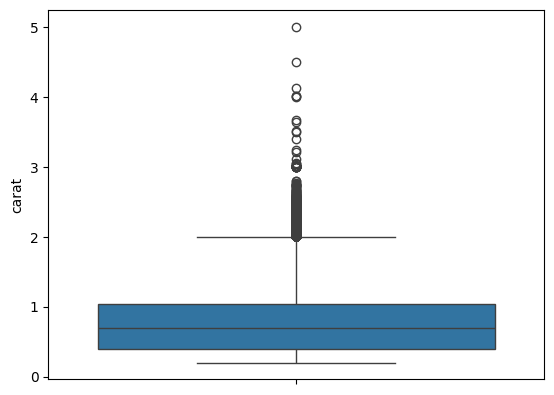

: 

In [16]:
# explore the number of carats
sns.boxplot(data['carat'])